In [305]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# The problem is of linear regrassion, I will be import regression algorithm libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge


In [306]:
# import data for analysis

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [307]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values

In [308]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


The data looks good but I'm suspecting outliers on HR, SO, SB, ER due to the margin between Q3 and Max values, and also std values

In [309]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Data types are numerical, so there is not need for data conversion

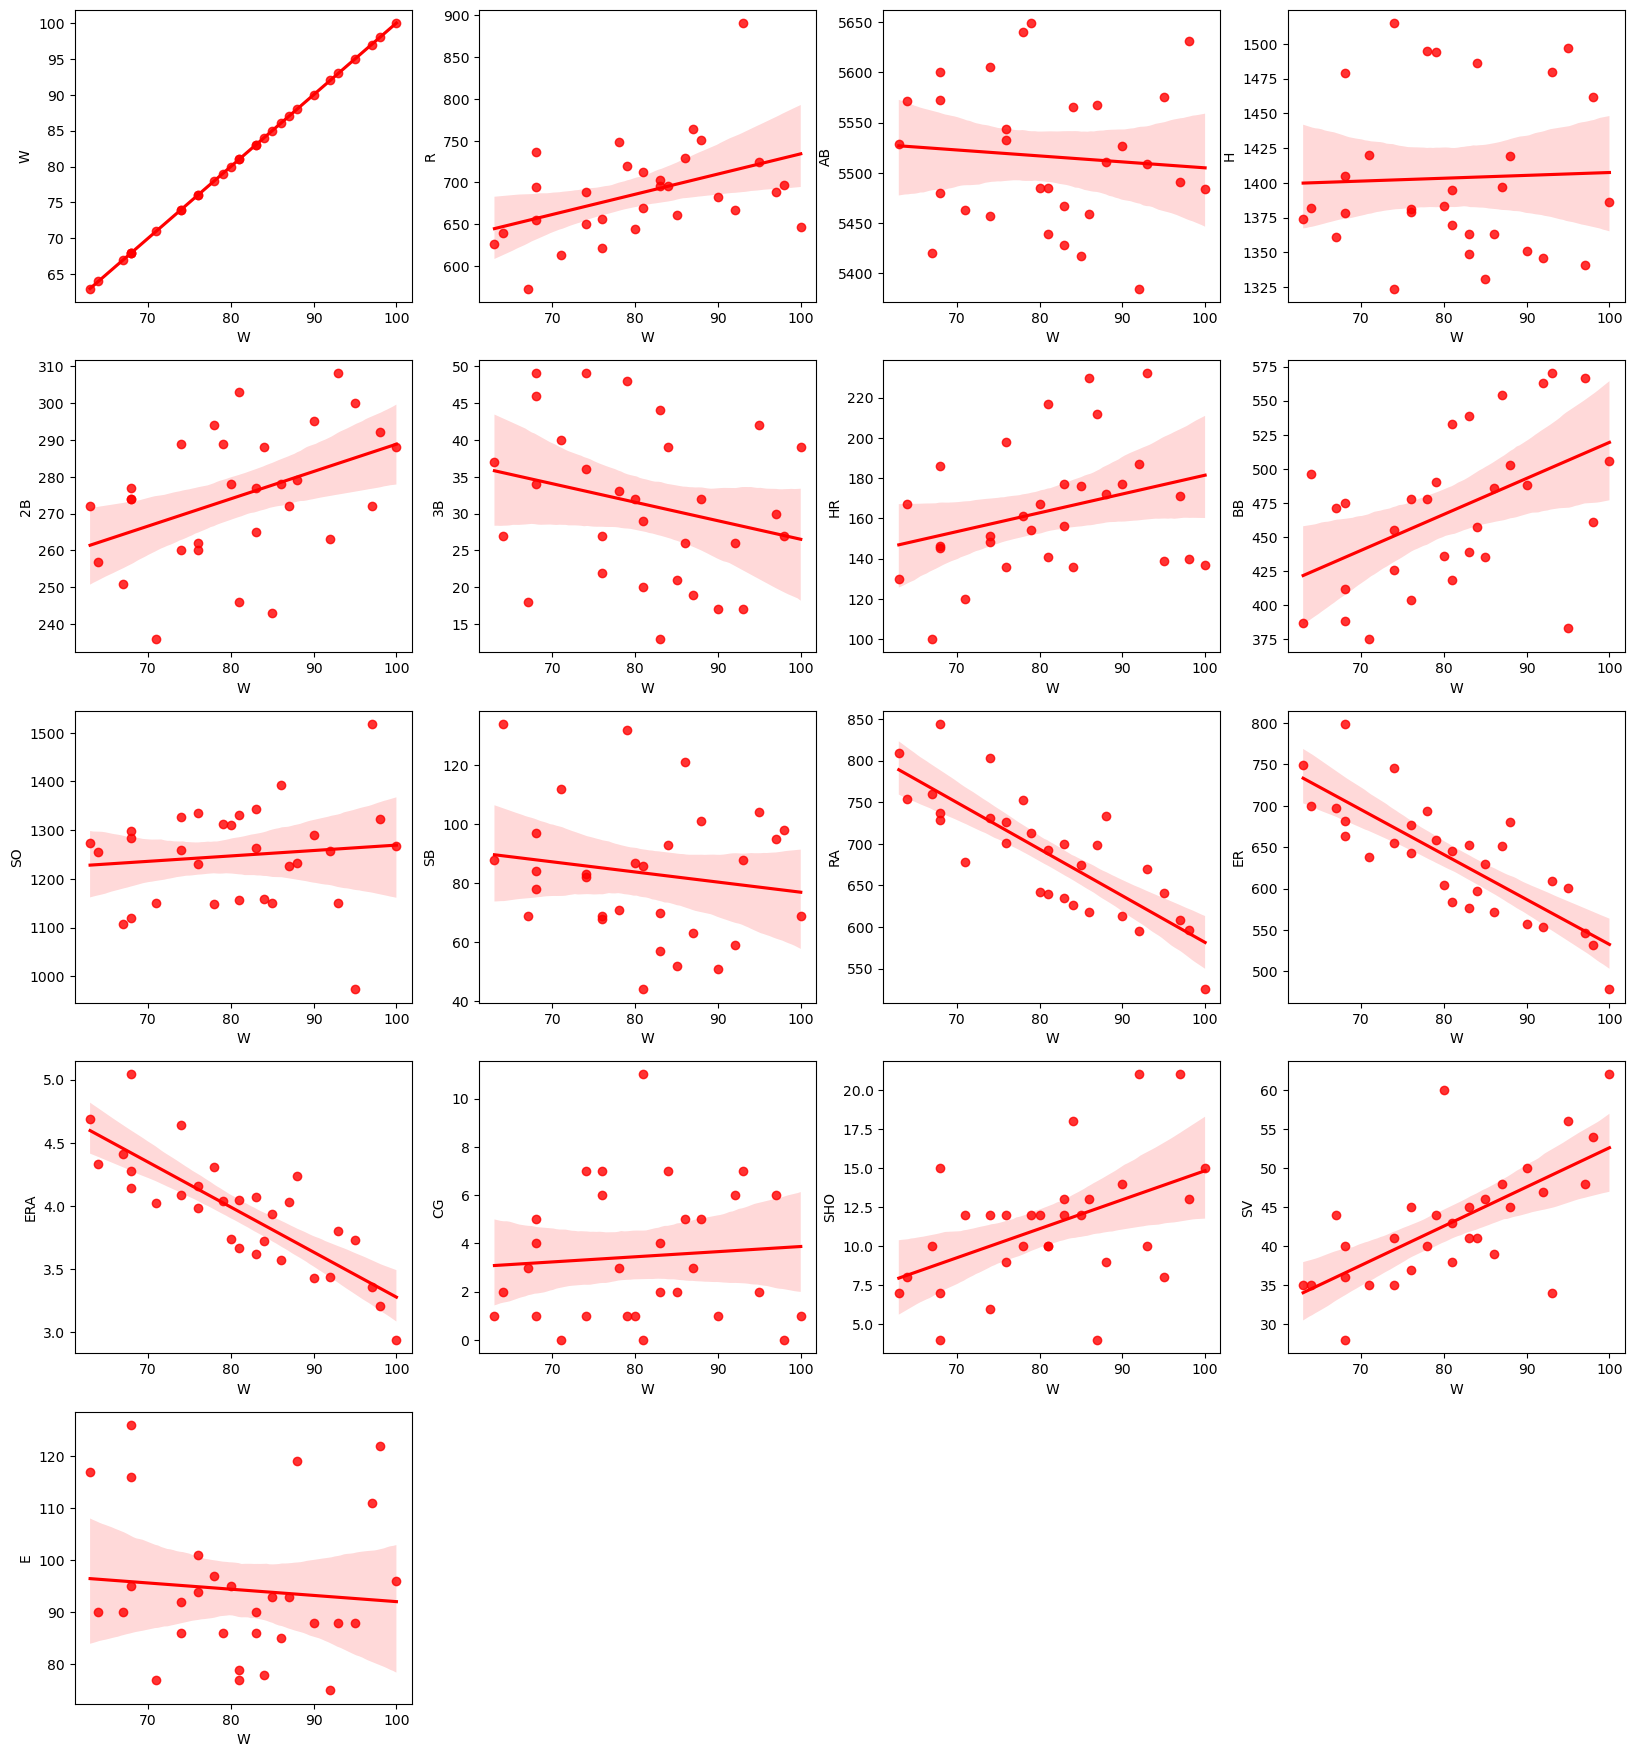

In [310]:
# Plot to check correlationship between features and label

plt.figure(figsize=(20,22))

p = 1

for i in df:
    if p <= 18:
        plt.subplot(5,4,p)
        snb.regplot(x='W', y=i, data=df, color='r')
        plt.xlabel='W'
        plt.ylabel=i
        
    p += 1

plt.show()

In [311]:
# Select best performing features
from sklearn.feature_selection import SelectKBest, f_classif

# Seperate the label from the features
x = df.drop('W', axis=1)

y = df['W']

In [361]:
# Checking best performing features
best_features = SelectKBest(score_func=f_classif,k=9)
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(17,'score'))

   feature_name     score
8            SB  3.283197
12           SV  2.941436
13            E  2.492758
0             R  2.485509
9           ERA  1.732208
1            AB  1.622586
7            SO  1.519889
11          SHO  1.253358
6            BB  0.943327
5            HR  0.818974
4            3B  0.811129
3            2B  0.799063
2             H  0.729450
10           CG  0.361597


In [313]:
df.shape

(30, 17)

The amount of data we are working with is small, so I will not be droping any column

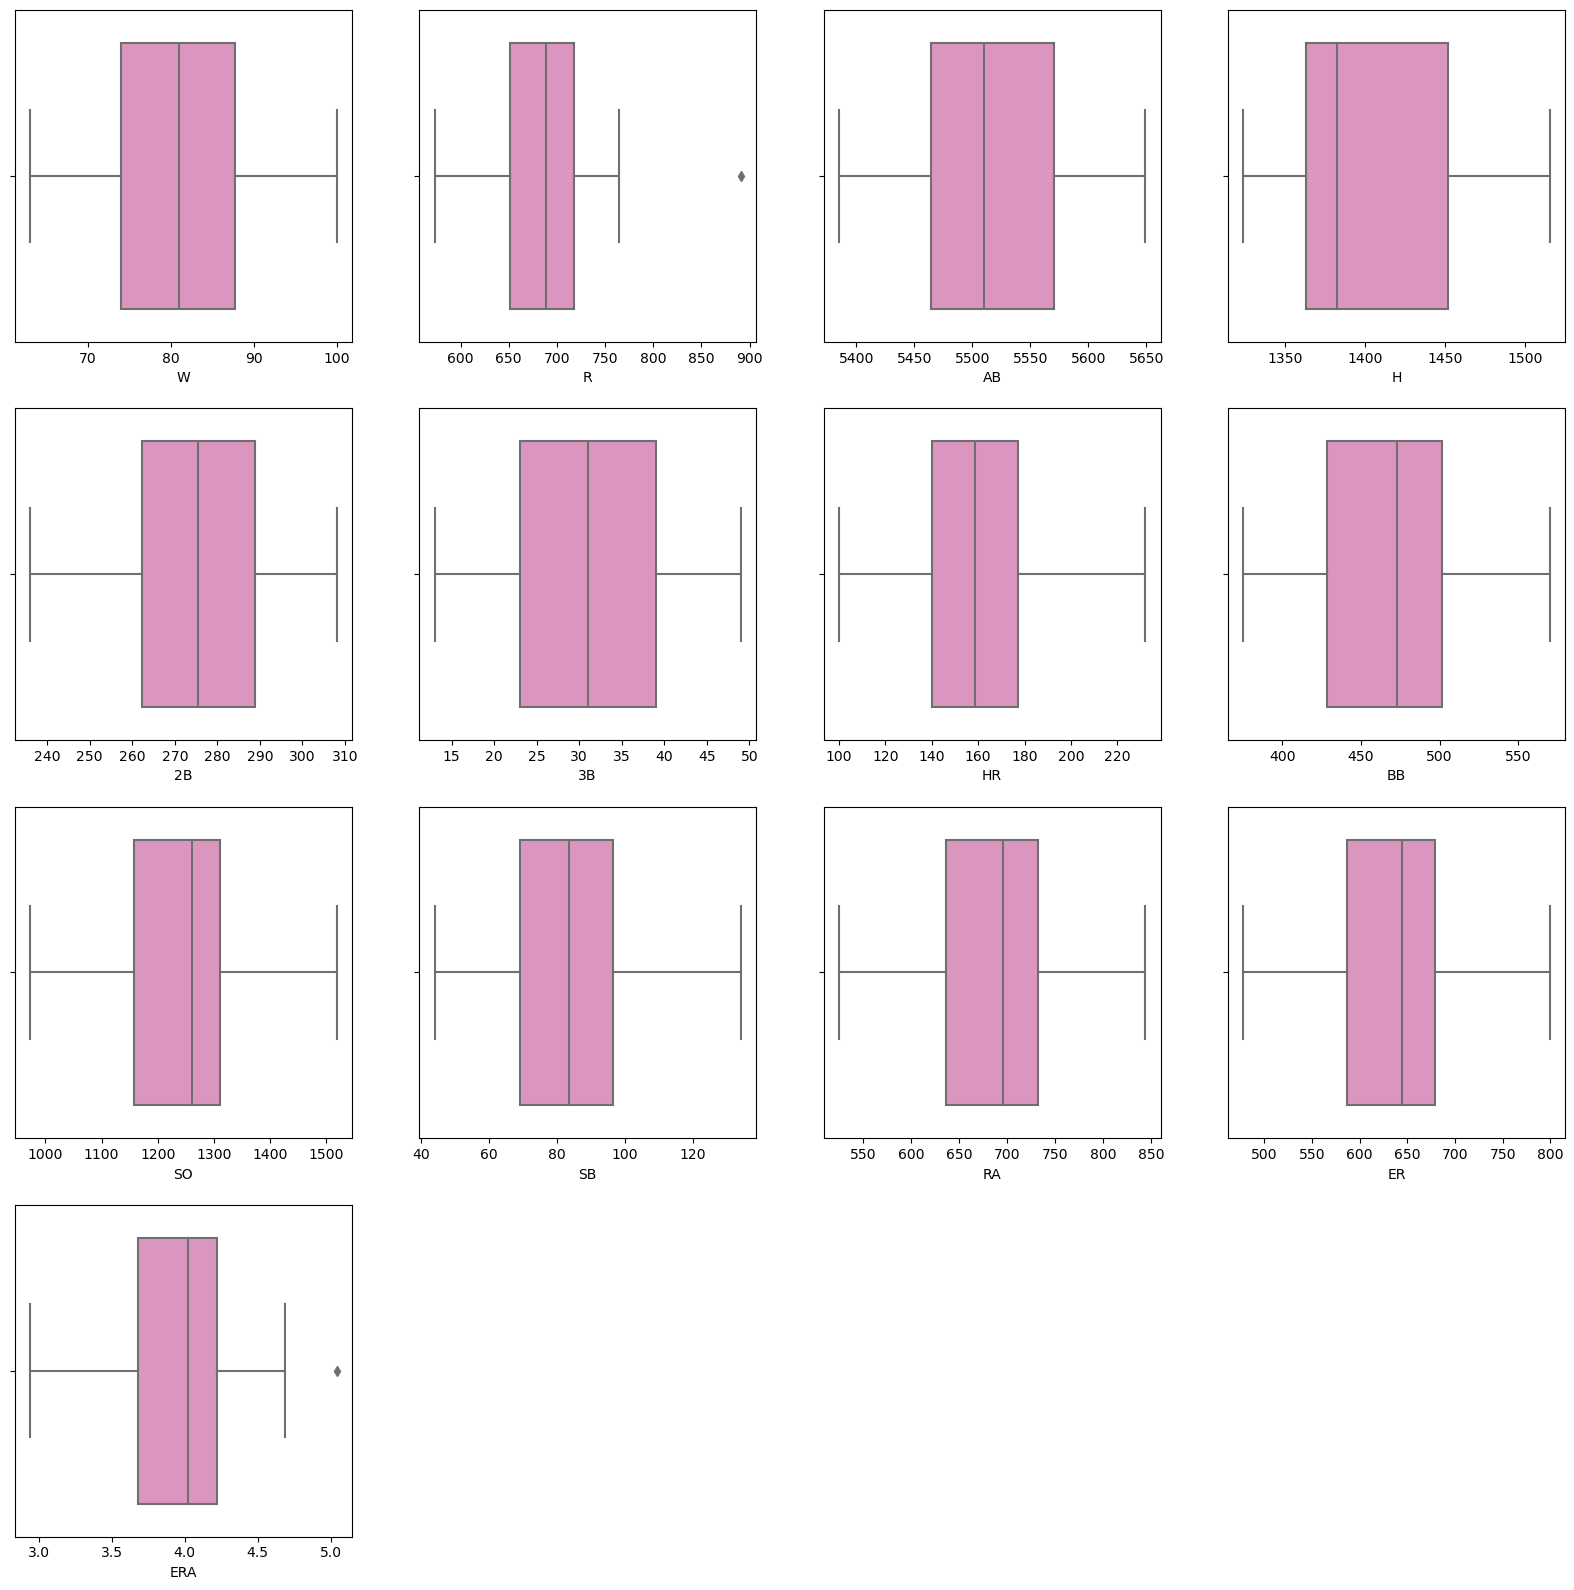

In [314]:
# Lets check for outliers using Boxplot

plt.figure(figsize=(20,25))

p=1

for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        snb.boxplot(df[i], palette='Set2_r')
        plt.xlabel=i
        
    p+=1
    
plt.show()

In [315]:
#removing the outliers using zscore

from scipy.stats import zscore

out_features = df[['R','ERA']]
z=np.abs(zscore(out_features))

z

,R,ERA
0,0.619078,0.506955
1,0.134432,0.254598
2,0.332906,0.641347
3,1.146419,0.053010
4,0.013270,1.531318
5,3.509647,0.350165
6,1.311430,0.165003
7,0.428681,0.209800
8,0.765626,0.484557
9,1.034489,0.792164


In [316]:
np.where(z>3)

(array([5]), array([0]))

In [317]:
df2 = df[(z<3).all(axis=1)]

df2

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [318]:
#data loss is relatively not much

print('percentage data loss after removing outliers ', ((df.shape[0] - df2.shape[0])/df.shape[0])* 100)

percentage data loss after removing outliers using IQR  3.3333333333333335


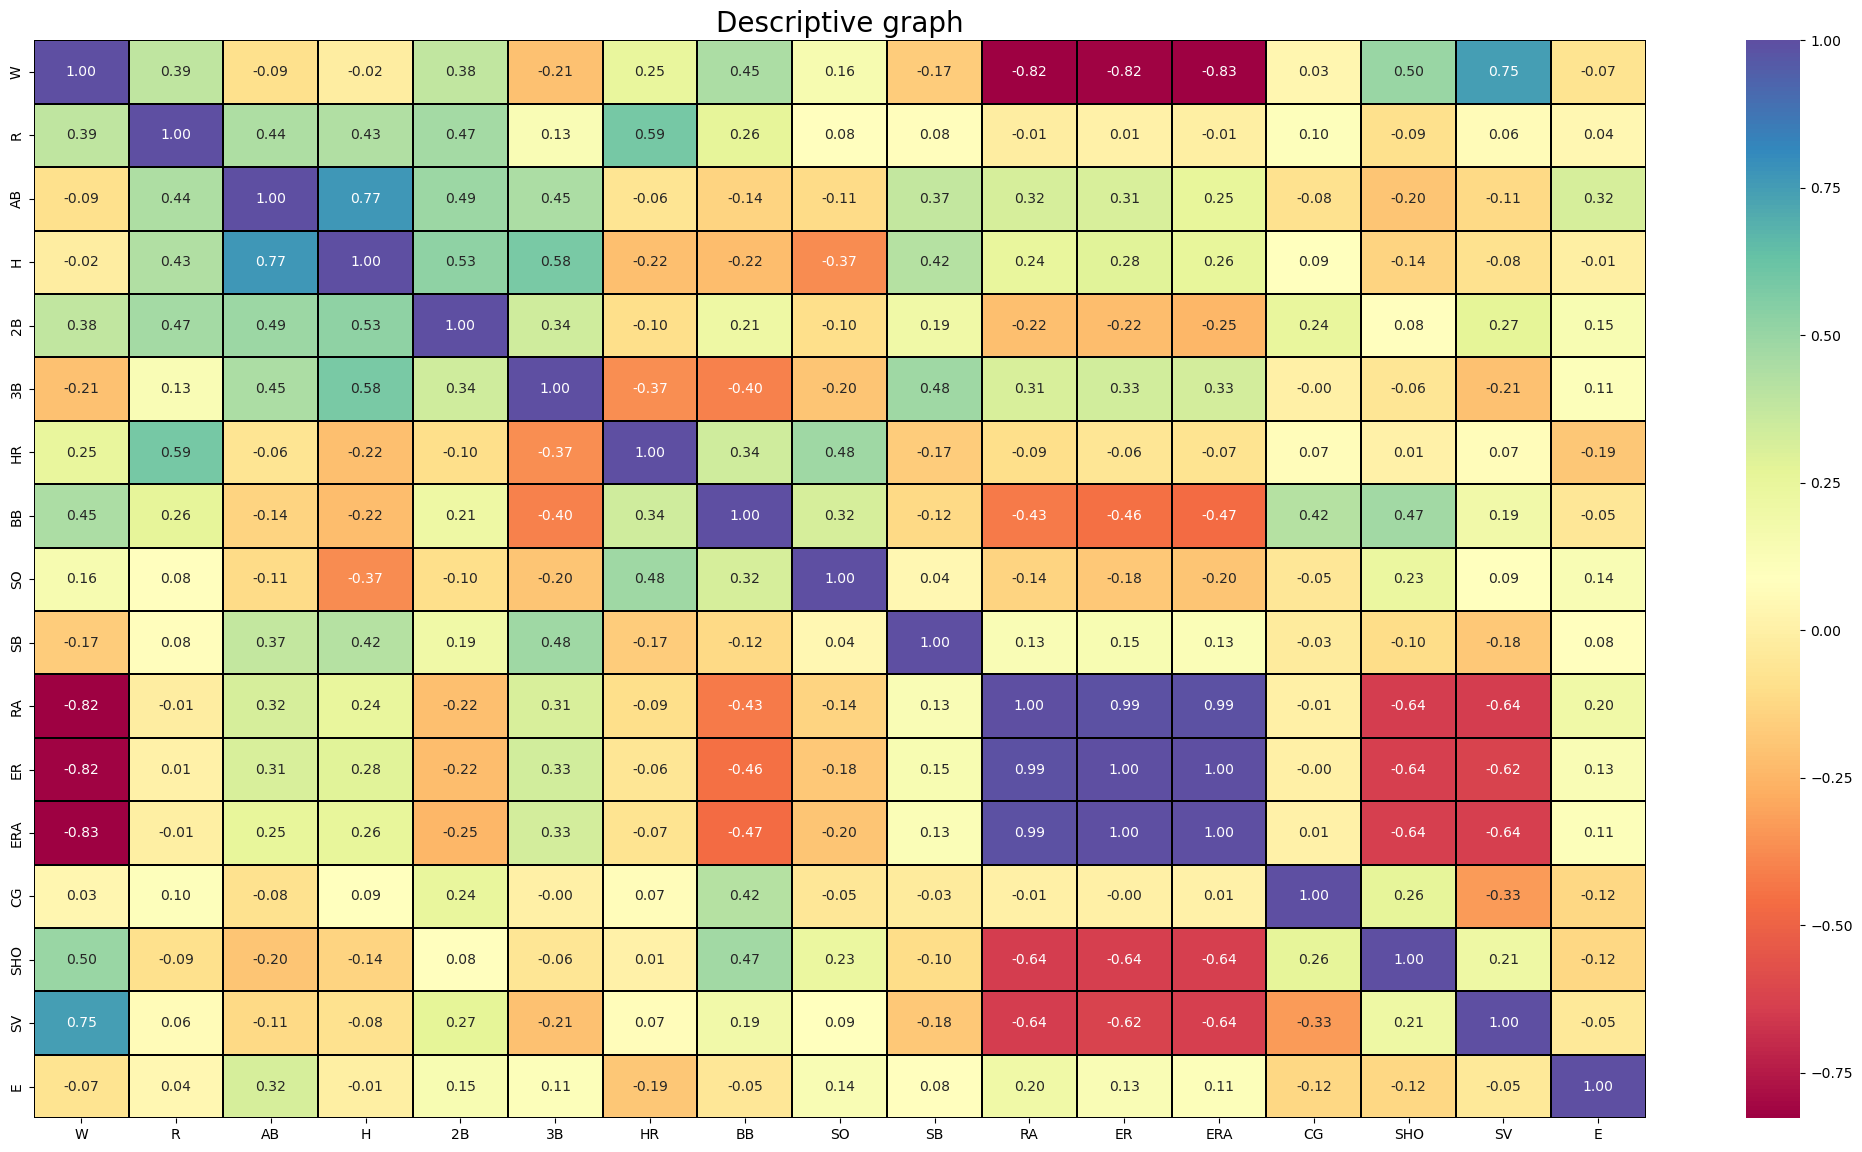

In [319]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df2.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

There is multi colinearity between ER, ERA, RA.
I will drop two among them

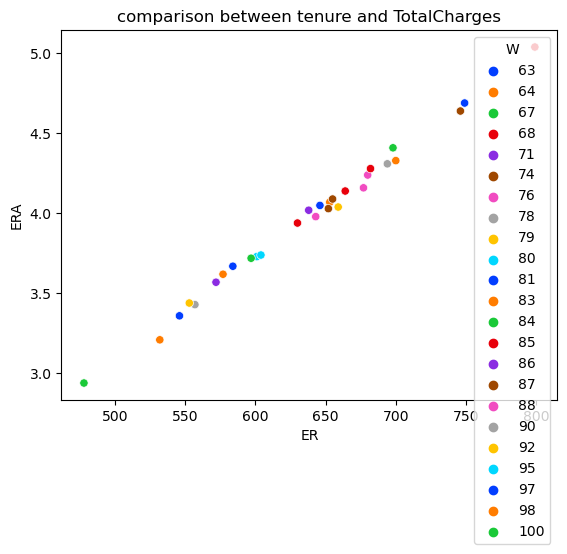

In [320]:
plt.title('comparison between tenure and TotalCharges')
snb.scatterplot(x='ER', y = 'ERA', data =df2, hue='W', palette='bright')
plt.show()

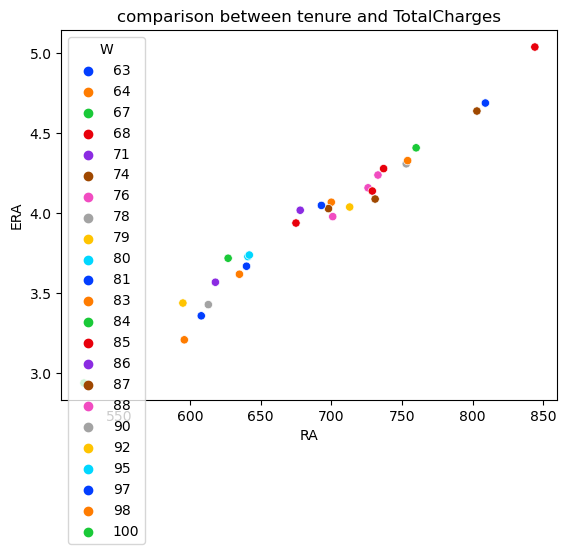

In [321]:
plt.title('comparison between tenure and TotalCharges')
snb.scatterplot(x='RA', y = 'ERA', data =df2, hue='W', palette='bright')
plt.show()

In [322]:
# This graph is to confirm the multicolinearity, The graph confirm strong corelationship
# I will be droping RA and ER because ERA has stronger relatioship with W

df2.drop(columns=['ER', 'RA'], inplace= True)

df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [323]:
# Checking for skewness

df2.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [324]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation to the skewed column
pt = PowerTransformer(method='yeo-johnson')

df2['OverTime'] = pt.fit_transform(df2['OverTime'].values.reshape(-1, 1))

df2.skew()

for col in df2:
    if (df2[col].skew() < -0.5) or (df2[col].skew() > 0.5):
        #np.log(df[col])
        pt.fit_transform(df[col].values.reshape(-1, 1))
df2.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [325]:
# Seperate the label from the features
x = df2.drop('W', axis=1)

y = df2['W']

In [326]:
# Checking Variance Inflation Factor to confirm multiple colinearity and variance value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,1493.705688,R
1,3861.415079,AB
2,3823.864099,H
3,844.083717,2B
4,34.685687,3B
5,186.767282,HR
6,227.927442,BB
7,314.579409,SO
8,26.391967,SB
9,364.225388,ERA


The features are within the threshold of 10

In [327]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.614123,0.617213,-0.570122,0.211006,1.757915


In [328]:
maxAccu = 0
maxRS = 0

for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.9125145695303327  at random state :  104


In [329]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [330]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_LR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_LR))
print('mean squared error : ',mean_squared_error(y_test, pred_LR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score :  0.9125145695303327
R2 Score on training data :  92.95326152658203
mean absolute error :  2.499806197425662
mean squared error :  11.56751802876712
root mean squared error :  3.401105412769078


In [331]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_RFR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_RFR))
print('mean squared error : ',mean_squared_error(y_test, pred_RFR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 Score :  0.6682442857142856
R2 Score on training data :  89.69851523120754
mean absolute error :  5.63888888888889
mean squared error :  43.8654777777778
root mean squared error :  6.623101824506233


In [332]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_knn))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_knn))
print('mean squared error : ',mean_squared_error(y_test, pred_knn))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 Score :  0.4479327731092436
R2 Score on training data :  68.87135656366426
mean absolute error :  7.111111111111111
mean squared error :  72.99555555555555
root mean squared error :  8.543743649920422


In [333]:
GRR = GradientBoostingRegressor()
GRR.fit(x_train, y_train)
pred_GRR = GRR.predict(x_test)
pred_train = GRR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_GRR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_GRR))
print('mean squared error : ',mean_squared_error(y_test, pred_GRR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_GRR)))

R2 Score :  0.6469991327064568
R2 Score on training data :  99.99999635197749
mean absolute error :  5.7197816547299505
mean squared error :  46.674559119924055
root mean squared error :  6.831878154645621


In [334]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_lasso))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_lasso))
print('mean squared error : ',mean_squared_error(y_test, pred_lasso))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score :  0.7968784020425906
R2 Score on training data :  84.40184944809141
mean absolute error :  4.594994596847048
mean squared error :  26.857189063257458
root mean squared error :  5.182392214340541


In [335]:
ridge =Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_ridge))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_ridge))
print('mean squared error : ',mean_squared_error(y_test, pred_ridge))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score :  0.8805807303389112
R2 Score on training data :  91.70012220510357
mean absolute error :  3.1709924281039545
mean squared error :  15.789881210743971
root mean squared error :  3.9736483501618474


In [336]:
# Do cross validation for the models to validate model performance

from sklearn.model_selection import cross_val_score

#cross_val_score(model/estimate, features, target, CV=5, scoring='r2')
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_LR) - score.mean())

[ 0.59960667 -1.04852042  0.63023213  0.56003545  0.7367276 ]
0.2956162841694422
Difference between R2 score and cross validation score is  0.6168982853608905


In [337]:
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_RFR) - score.mean())

[ 0.47090023 -4.66980921  0.41802125  0.41460098  0.84402683]
-0.5044519850952798
Difference between R2 score and cross validation score is  1.1726962708095654


In [338]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_knn) - score.mean())

[ 0.18768182 -2.35368421  0.40553743  0.27718033  0.77216981]
-0.14222296422361738
Difference between R2 score and cross validation score is  0.590155737332861


In [339]:
score = cross_val_score(GRR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_GRR) - score.mean())

[ 0.20171598 -8.54136265  0.4688294   0.51670417  0.86958163]
-1.2969062951212629
Difference between R2 score and cross validation score is  1.9439054278277197


In [340]:
score = cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_lasso) - score.mean())

[ 0.74709618 -1.04544966  0.77039332  0.78513235  0.87723793]
0.4268820240388044
Difference between R2 score and cross validation score is  0.36999637800378626


In [341]:
score = cross_val_score(ridge,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_ridge) - score.mean())

[ 0.59967223 -1.24934118  0.66658864  0.89872169  0.87120873]
0.3573700220955519
Difference between R2 score and cross validation score is  0.5232107082433592


Ridge has the lowest difference, therefore I will go for Lasso

In [348]:
# The best choice is lasso

# The model with the least dif the best choice
# Hyper parameter tuning to get best parameter for my model
#Build model for best performing option

from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lasso, param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]}, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value and corresponding R2 score
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_

In [350]:
best_alpha

1.0

In [356]:
# Train the final model using the best alpha
model = Lasso(alpha=best_alpha)
model.fit(x_train, y_train)

# Evaluate the final model's performance on the test set
test_r2 = model.score(x_test, y_test)
pred = model.predict(x_test)

print("Best Alpha:", best_alpha)
print("Best R2 Score on Validation Set:", best_r2)
print("R2 Score on Test Set:", test_r2)

print('R2 Score : ', r2_score(y_test, pred))
print('mean absolute error : ',mean_absolute_error(y_test, pred))
print('mean squared error : ',mean_squared_error(y_test, pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred)))

Best Alpha: 1.0
Best R2 Score on Validation Set: 0.4256528426251654
R2 Score on Test Set: 0.7968784020425906
R2 Score :  0.7968784020425906
mean absolute error :  4.594994596847048
mean squared error :  26.857189063257458
root mean squared error :  5.182392214340541


In [344]:
model= Ridge(alpha=2,fit_intercept=True, positive=True, random_state=1,solver='auto')

In [345]:
model.fit(x_train, y_train)
pred = model.predict(x_test)

print('R2 Score : ', r2_score(y_test, pred))
print('mean absolute error : ',mean_absolute_error(y_test, pred))
print('mean squared error : ',mean_squared_error(y_test, pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred)))


R2 Score :  0.7398024394068481
mean absolute error :  5.171821171006106
mean squared error :  34.40389967842786
root mean squared error :  5.865483754851586


 'copy_X': ['True', 'False'],  # Weight function used in prediction
    'fit_intercept': ['True', 'False']  # Power parameter for the Minkowski distance metric
    'max_iter': 
    'normalize':
    'normalize':
    'precompute':
    'precompute':
    'random_state':
    'selection':
    'tol':
    'warm_start':

In [362]:
# Save model

import joblib
import pickle

filename = 'baseballWins.pkl'
pickle.dump(model,open(filename, 'wb'))

In [363]:
loaded_model = pickle.load(open('baseballWins.pkl','rb'))

result = loaded_model.score(x_test, y_test)
print(result * 100)

79.68784020425906


In [360]:
con = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])

con

,0,1,2,3,4,5,6,7,8
Predicted,88.106224,72.301521,72.089571,89.388006,78.131934,79.768851,75.327126,92.64116,77.409041
Original,92.000000,64.000000,67.000000,90.000000,76.000000,88.000000,71.000000,98.00000,74.000000


In [ ]:
# I can attribute low score to small data we worked it.